# Computer Vision Contours

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Contours

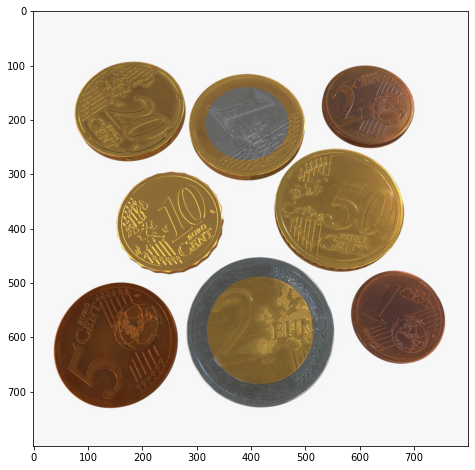

In [2]:
# Have a look at the image below
color_coins = cv2.imread('img/coins5.jpg', cv2.IMREAD_COLOR)
rgb_coins = cv2.cvtColor(color_coins,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_coins);

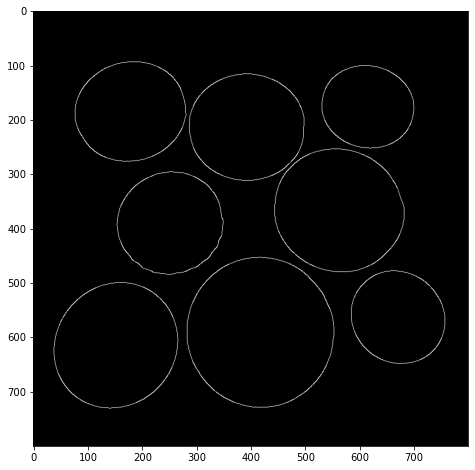

In [3]:
# Convert the image above to grayscale
gray_coins = cv2.cvtColor(color_coins, cv2.COLOR_RGB2GRAY)


# Apply some gaussian blur to it (try differente size kernels)
kernel = (11, 11)
std = 3
blur_coins = cv2.GaussianBlur(gray_coins, kernel, std)


# Apply Canny to find edges and display the image 
edge_coins = cv2.Canny(blur_coins, 100, 200)

plt.figure(figsize = (12,8))
plt.imshow(edge_coins, cmap='gray');


In [4]:
contours_color = (0, 255, 0)

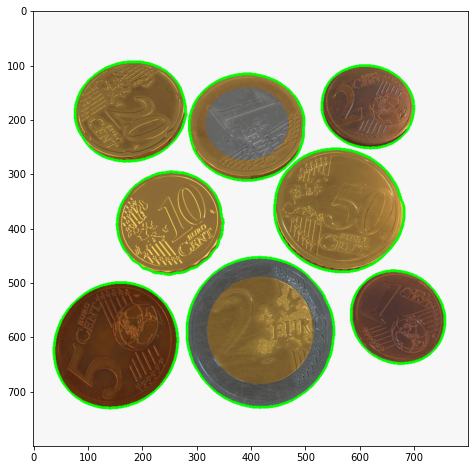

In [16]:
# Now find the contours on the image where you applied canny as well as in the grayscale image
# Draw the contours on the images (or better yet on copies of the images)
# Display the images, how does it look like?

contours, h = cv2.findContours(edge_coins, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
coins_contours = rgb_coins.copy()
cv2.drawContours(coins_contours, contours, -1, contours_color, 3)

plt.figure(figsize = (12,8))
plt.imshow(coins_contours);


[Hint](# "You will need to use cv2.findContours and cv2.drawContours") 

In [6]:
# print the number of contours that has been found
len(contours)

8

[Hint](# "Simply use the built it python len funtion -> len(coins_contours)") 

In [7]:
# Load your own images and try the same, Note:
# applying gaussian blur and canny is not necessary but can be useful to clean up the image and get rid of noise


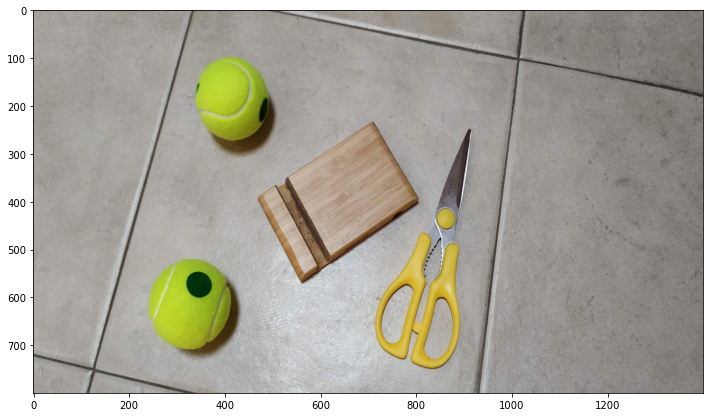

In [8]:
stuff = cv2.imread('img/mine.jpg', cv2.IMREAD_COLOR)

resized_stuff = cv2.resize(stuff, (1400, 800), )

rgb_stuff = cv2.cvtColor(resized_stuff,cv2.COLOR_BGR2RGB)

plt.figure(figsize = (12,8))
plt.imshow(rgb_stuff);

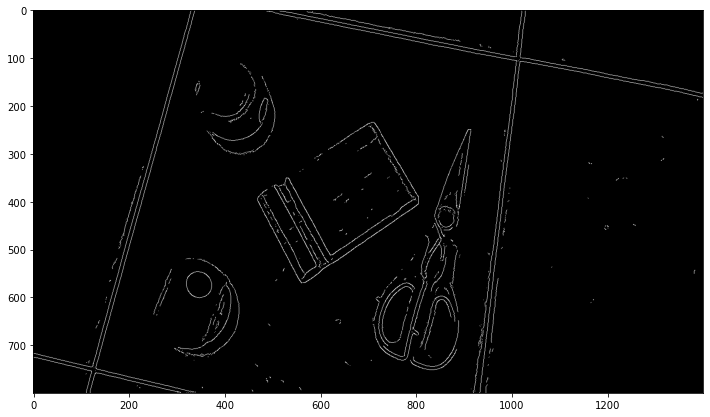

In [9]:
gray_stuff = cv2.cvtColor(rgb_stuff, cv2.COLOR_RGB2GRAY)


# Apply some gaussian blur to it (try differente size kernels)
kernel = (51, 51)
std = 3
blur_stuff = cv2.GaussianBlur(gray_stuff, kernel, std)


# Apply Canny to find edges and display the image 
edge_stuff = cv2.Canny(blur_stuff, 25, 25)

plt.figure(figsize = (12,8))
plt.imshow(edge_stuff, cmap='gray');

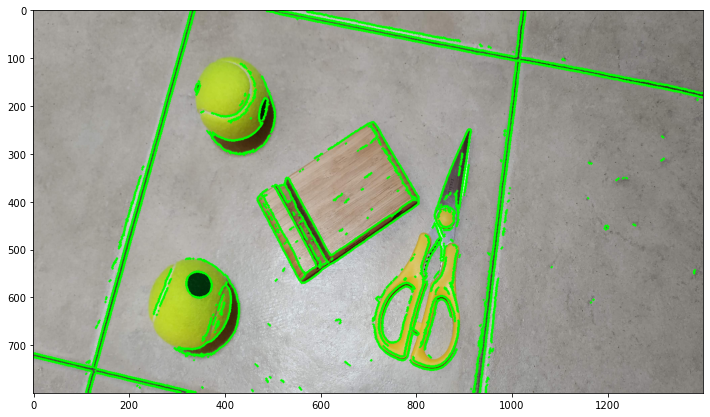

In [10]:
contours_stuff, h_stuff = cv2.findContours(edge_stuff, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
stuff_contours = rgb_stuff.copy()
cv2.drawContours(stuff_contours, contours_stuff, -1, contours_color, 3)

plt.figure(figsize = (12,8))
plt.imshow(stuff_contours);

## Sorting Contours

### By area

In [11]:
def get_contour_areas(contours):
    all_areas = []
    for contour in contours:
        contour_area = cv2.contourArea(contour)
        all_areas.append(contour_area)
    return all_areas

In [12]:
# We can sort contours with any function, a really useful way of sorting is by area, in many situations we might
# only want to find the biggest or smallest contours, I'm providing the function I use to get all contour areas
# This function is useful to be able to see at a glance all contours areas and get a sense of what is the biggest 
# And which one is the smallest one, however we will not use this to sort them we can just pass cv2.contourArea 
# To the function that is going to be sorting it later
# Call get_contour_areas an pass in the list of contours you got with openCV and then store the results in a var


In [24]:
# Print the contour areas to screen
contour_areas = get_contour_areas(contours)

contour_areas

[41128.5, 23077.0, 58468.0, 28632.0, 177.5, 32882.5, 20261.0, 29296.0]

In [25]:
# Now sort the areas by biggest to smallest and print the sorted areas
biggest2smaller = sorted(contour_areas, reverse=True)

biggest2smaller

[58468.0, 41128.5, 32882.5, 29296.0, 28632.0, 23077.0, 20261.0, 177.5]

[Hint](# "Use the built it python sorted funtion pass in the cv2.contourArea as the key for sorting") 

In [27]:
# Now sort the areas in the opposite way smallest to biggest and print the sorted areas
smallest2biggest = sorted(contour_areas)

smallest2biggest

[177.5, 20261.0, 23077.0, 28632.0, 29296.0, 32882.5, 41128.5, 58468.0]

In [28]:
# Filter out only the 5 biggest contours and print them
five_biggest = biggest2smaller[:5]
five_biggest

[58468.0, 41128.5, 32882.5, 29296.0, 28632.0]

[Hint](# "Just slice the array!") 

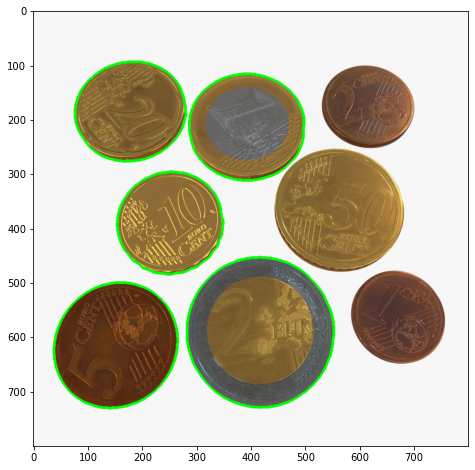

In [30]:
# Now in a clean image draw the contours you just filtered out and display it
filtered_contours = rgb_coins.copy()

sorted_cont = sorted(contours, key=cv2.contourArea, reverse=True)

cv2.drawContours(filtered_contours, sorted_cont[:5], -1, contours_color, 3)

plt.figure(figsize = (12,8))
plt.imshow(filtered_contours);

In [ ]:
# Repeat the same with your own images, practice sorting contours and think of how it can be useful
# You might need to sort them by something else, just be creative!


### By X coordinate (left to right)

In [ ]:
def get_contour_x_center_coordinate(contours):    
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return(int(M['m10']/M['m00']))

[OpenCV Moments](https://www.learnopencv.com/find-center-of-blob-centroid-using-opencv-cpp-python/)

In [ ]:
# This is an useful function you can use when you need to sort contours left to right
# Sort the contours this time left to right


In [ ]:
# Draw the contours one at a time and display the images on screen 


[Hint](# "You can just extract the one contour at a time from the list and pass it in to drawContours as a new list that contains that only one contour, you can use a for loop to iterate the contours") 

In [ ]:
# Can you think of other ways to sort contours?
